<a href="https://colab.research.google.com/github/shemanto27/Big-Mart-Sales-Prediction-Using-Machine-Learning/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> Big Mart Sales Prediction </h1>

# Step-0: Setup and Project Details 📜

## Projects Details
- Title: Big Mart Sales Prediction
- Problem Statement:

  The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

  The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

- Importance of this Project:

  Sales prediction is a very common real-world problem that each company faces atleasr once in a life time. If done correctly, it can have significant impact on the success and performance of that company. According to study, comanies with accurate sales predictions are 10% more likely to grow their revenue year-over-year and 7.3% more likely to hit quota.
  
- Objectives:
  - to build a predictive model to find out the sales of each product at a particular store

- Target Audience:
  - Big Mart decision makers

## Hypothesis Generation

Which factors can effect a product sales to increase or decrease?🤔
- store level:
  - location
  - distance of other shops/competition
  - discount
  - marketing
  - store condition/environment
  - city's population
  
- customer level:
  - income
  - family size
  - loyalty

- product level:
  - quality of the product
  - future price increase
  - demand
  - brand
  - offer/discount
  - marketing
  - display location/area
  - packaging

- macro level;
  - season
  - occation
  - economic growth

## Loading Packages and Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 4)
import seaborn as sns

# Set the Seaborn style
sns.set_style("darkgrid")  # You can also use "darkgrid", "white", "ticks"
sns.set_palette("viridis")  # You can also try "rocket", "mako", "flare", "magma", "viridis"


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Mart Sales Price Prediction/train_v9rqX0R.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Mart Sales Price Prediction/test_AbJTz2l.csv')

# Step-1: Data Exploration/Understanding the Data 🧐

In [ ]:
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2451,FDB05,5.155,Low Fat,0.083537,Frozen Foods,248.8776,OUT018,2009,Medium,Tier 3,Supermarket Type2
928,NCM29,11.500,LF,0.017670,Health and Hygiene,129.8626,OUT049,1999,Medium,Tier 1,Supermarket Type1
647,FDA08,11.850,Regular,0.050163,Fruits and Vegetables,163.1526,OUT049,1999,Medium,Tier 1,Supermarket Type1
3065,DRF27,8.930,Low Fat,0.028475,Dairy,152.3340,OUT045,2002,NaN,Tier 2,Supermarket Type1
1352,NCZ06,19.600,Low Fat,0.094353,Household,253.8698,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [ ]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
741,FDY02,8.945,Regular,0.000000,Dairy,264.7910,OUT017,2007,NaN,Tier 2,Supermarket Type1,4733.8380
82,FDV45,16.750,low fat,0.045231,Snack Foods,187.9556,OUT018,2009,Medium,Tier 3,Supermarket Type2,4693.8900
5729,NCV54,NaN,Low Fat,0.057969,Household,119.3124,OUT019,1985,Small,Tier 1,Grocery Store,474.0496
3432,FDC60,5.425,Regular,0.191603,Baking Goods,87.0514,OUT010,1998,NaN,Tier 3,Grocery Store,88.5514
7028,FDT49,7.000,Low Fat,0.151406,Canned,107.7280,OUT046,1997,Small,Tier 1,Supermarket Type1,2024.0320


In [ ]:
df_test['Item_Outlet_Sales'] = np.nan
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [ ]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
#separate num and categorical features
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [ ]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [ ]:
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


## Univariate Analysis

### Target Variable

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

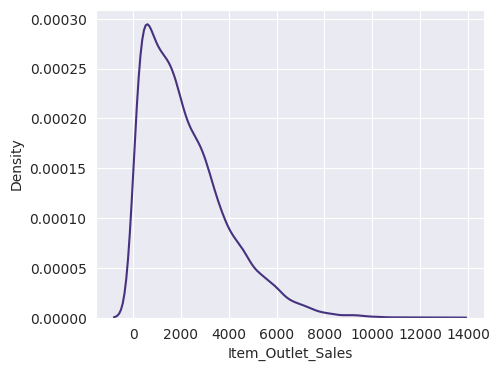

In [ ]:
# distribution of Target variable
sns.kdeplot(df_num['Item_Outlet_Sales'])

#### ✨ Findings
target variable is right skewed,need to normalize --> log transformation

### Numeric Features

<Axes: >

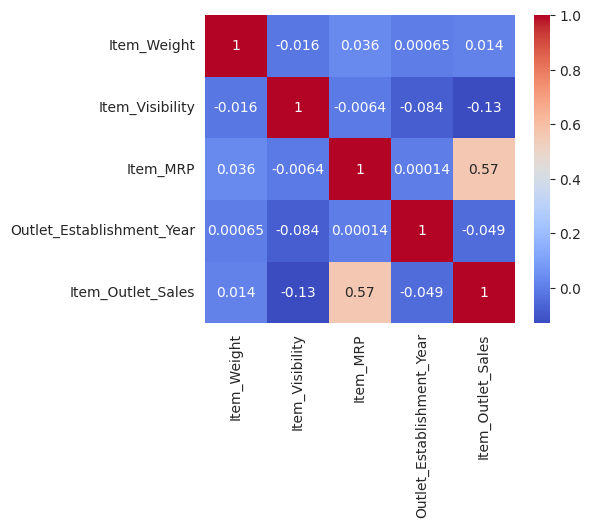

In [ ]:
# correlation of the numeric variables
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Mask the upper triangle to avoid duplicate correlations (A-B and B-A)
mask = np.triu(np.ones(correlation_matrix.shape), k=1)  # Mask upper triangle (k=1 excludes diagonal)

# Apply the mask to the correlation matrix
correlation_matrix = correlation_matrix.where(mask == 0)

# Now remove self-correlation (where the correlation is 1)
correlation_matrix = correlation_matrix[correlation_matrix != 1]

# Convert to a Series and sort values
correlation_series = correlation_matrix.stack().sort_values(ascending=False)

correlation_series


Item_Outlet_Sales          Item_MRP                     0.567574
Item_MRP                   Item_Weight                  0.036236
Item_Outlet_Sales          Item_Weight                  0.014123
Outlet_Establishment_Year  Item_Weight                  0.000645
                           Item_MRP                     0.000141
Item_MRP                   Item_Visibility             -0.006351
Item_Visibility            Item_Weight                 -0.015901
Item_Outlet_Sales          Outlet_Establishment_Year   -0.049135
Outlet_Establishment_Year  Item_Visibility             -0.083678
Item_Outlet_Sales          Item_Visibility             -0.128625
dtype: float64

#### ✨ Findings
target variable has +ve relation with: Item_MRP

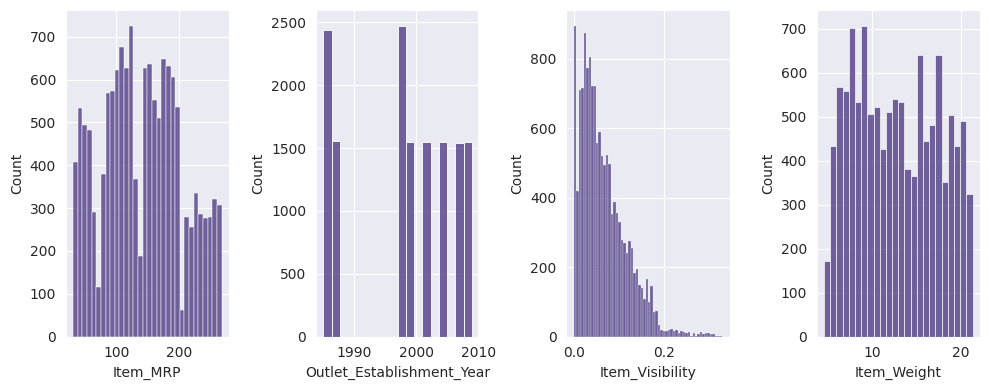

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
sns.histplot(df_num['Item_MRP'], label='Item_MRP')

plt.subplot(1,4,2)
sns.histplot(df_num['Outlet_Establishment_Year'], label='Outlet_Establishment_Year')

plt.subplot(1,4,3)
sns.histplot(df_num['Item_Visibility'], label='Item_Visibility')

plt.subplot(1,4,4)
sns.histplot(df_num['Item_Weight'], label='Item_Weight')

plt.tight_layout()
plt.show()

In [ ]:
pd.Series(df_num['Outlet_Establishment_Year'].unique()).sort_values(ascending=True)

,0
4,1985
3,1987
7,1997
2,1998
0,1999
5,2002
8,2004
6,2007
1,2009


#### ✨Findings
- Item_visibility is right skewed --> should be transformed✅
- 4 different distribution for Item_MRP --> new feature can be created✅
- 3 different type of Outlet can be clusters based on year of establishment✅


In [ ]:
df_num.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df_num.isnull().sum()

,0
Item_Weight,2439
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,5681


#### ✨Findings
- Item_weight has missing values --> Impute

### Categorical Features

In [ ]:
df_cat.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1


<Axes: xlabel='count', ylabel='Outlet_Type'>

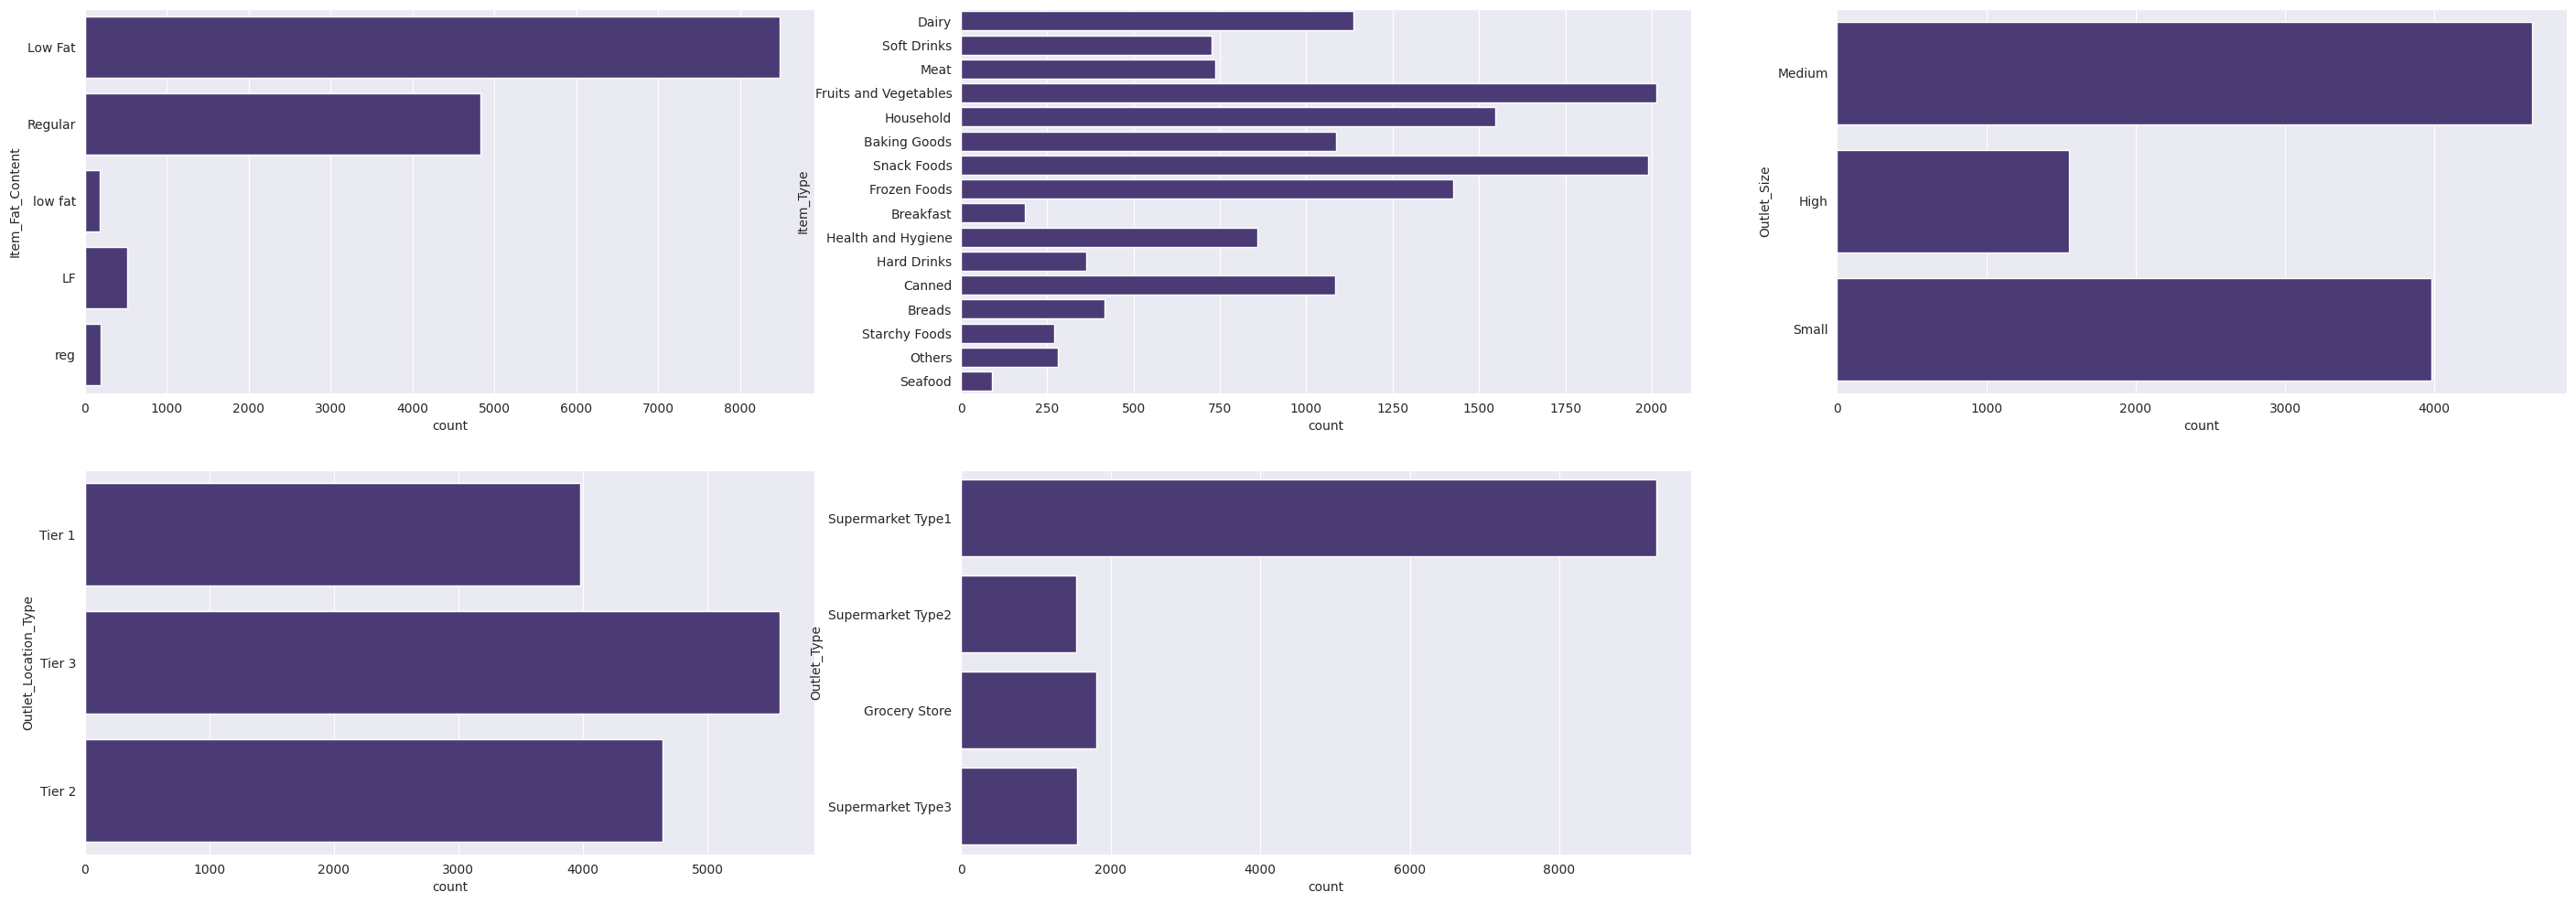

In [ ]:
plt.figure(figsize=(35,12))
plt.subplot(2,3,1)
sns.countplot(df_cat['Item_Fat_Content'])

plt.subplot(2,3,2)
sns.countplot(df_cat['Item_Type'])

plt.subplot(2,3,3)
sns.countplot(df_cat['Outlet_Size'])

plt.subplot(2,3,4)
sns.countplot(df_cat['Outlet_Location_Type'])

plt.subplot(2,3,5)
sns.countplot(df_cat['Outlet_Type'])

#### ✨Findings
- Item_fat_content has low fat & LF and regular & reg, which are same, separately -->need to marge
- most of the stores are in Tier-3 cities
- super market type-1 is 5x more
-  

In [ ]:
df_cat.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,10188,14204,14204
unique,1559,5,16,10,3,3,4
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,8485,2013,1559,4655,5583,9294


🎯🎯Pivot table and anova test is not done

## Bivariate Analysis


### Target vs Numeric

In [ ]:
df_num.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.3,0.016047,249.8092,1999,3735.138


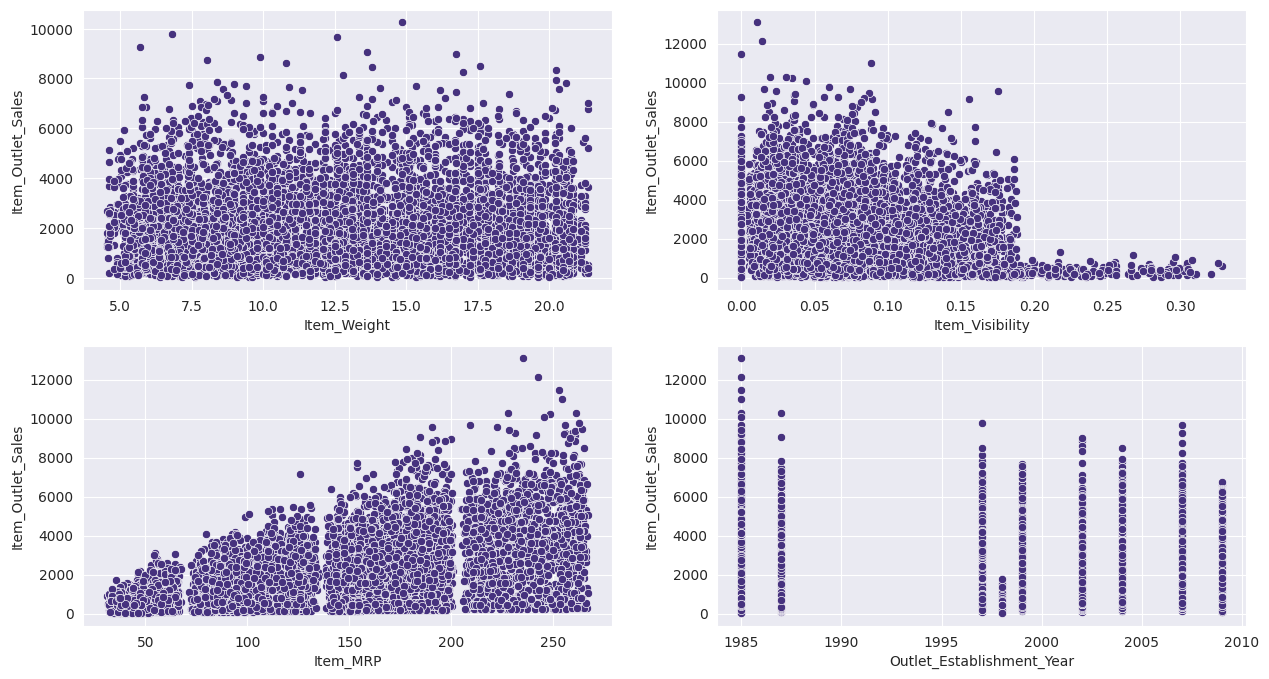

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.scatterplot(x = df_num['Item_Weight'], y = df_num['Item_Outlet_Sales'])

plt.subplot(2,2,2)
sns.scatterplot(x = df_num['Item_Visibility'], y = df_num['Item_Outlet_Sales'])

plt.subplot(2,2,3)
sns.scatterplot(x = df_num['Item_MRP'], y = df_num['Item_Outlet_Sales'])

plt.subplot(2,2,4)
sns.scatterplot(x = df_num['Outlet_Establishment_Year'], y = df_num['Item_Outlet_Sales'])

plt.show()

#### ✨Findings
- target vs item weight has no pattern, spread across the entire range
- target vs item_visibility: some item has visibility completly zero,which is very unusual
- there are 4 segments in item_MRP --> can create new feature
- there is a range in outlet_estalishment_year --> new feature can be created

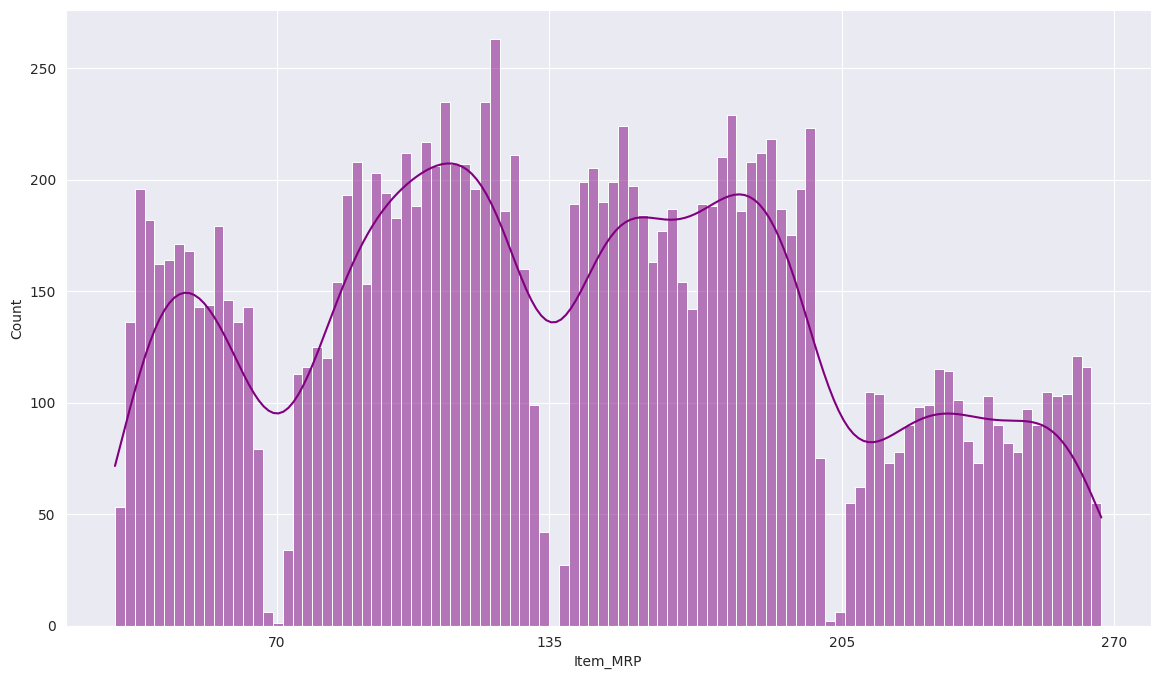

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(df_num['Item_MRP'], bins=100, kde=True, color='purple')
plt.xticks([70, 135, 205, 270])
plt.xlabel('Item_MRP')
plt.show()

### Target vs Categorical

In [ ]:
df_cat.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1


<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

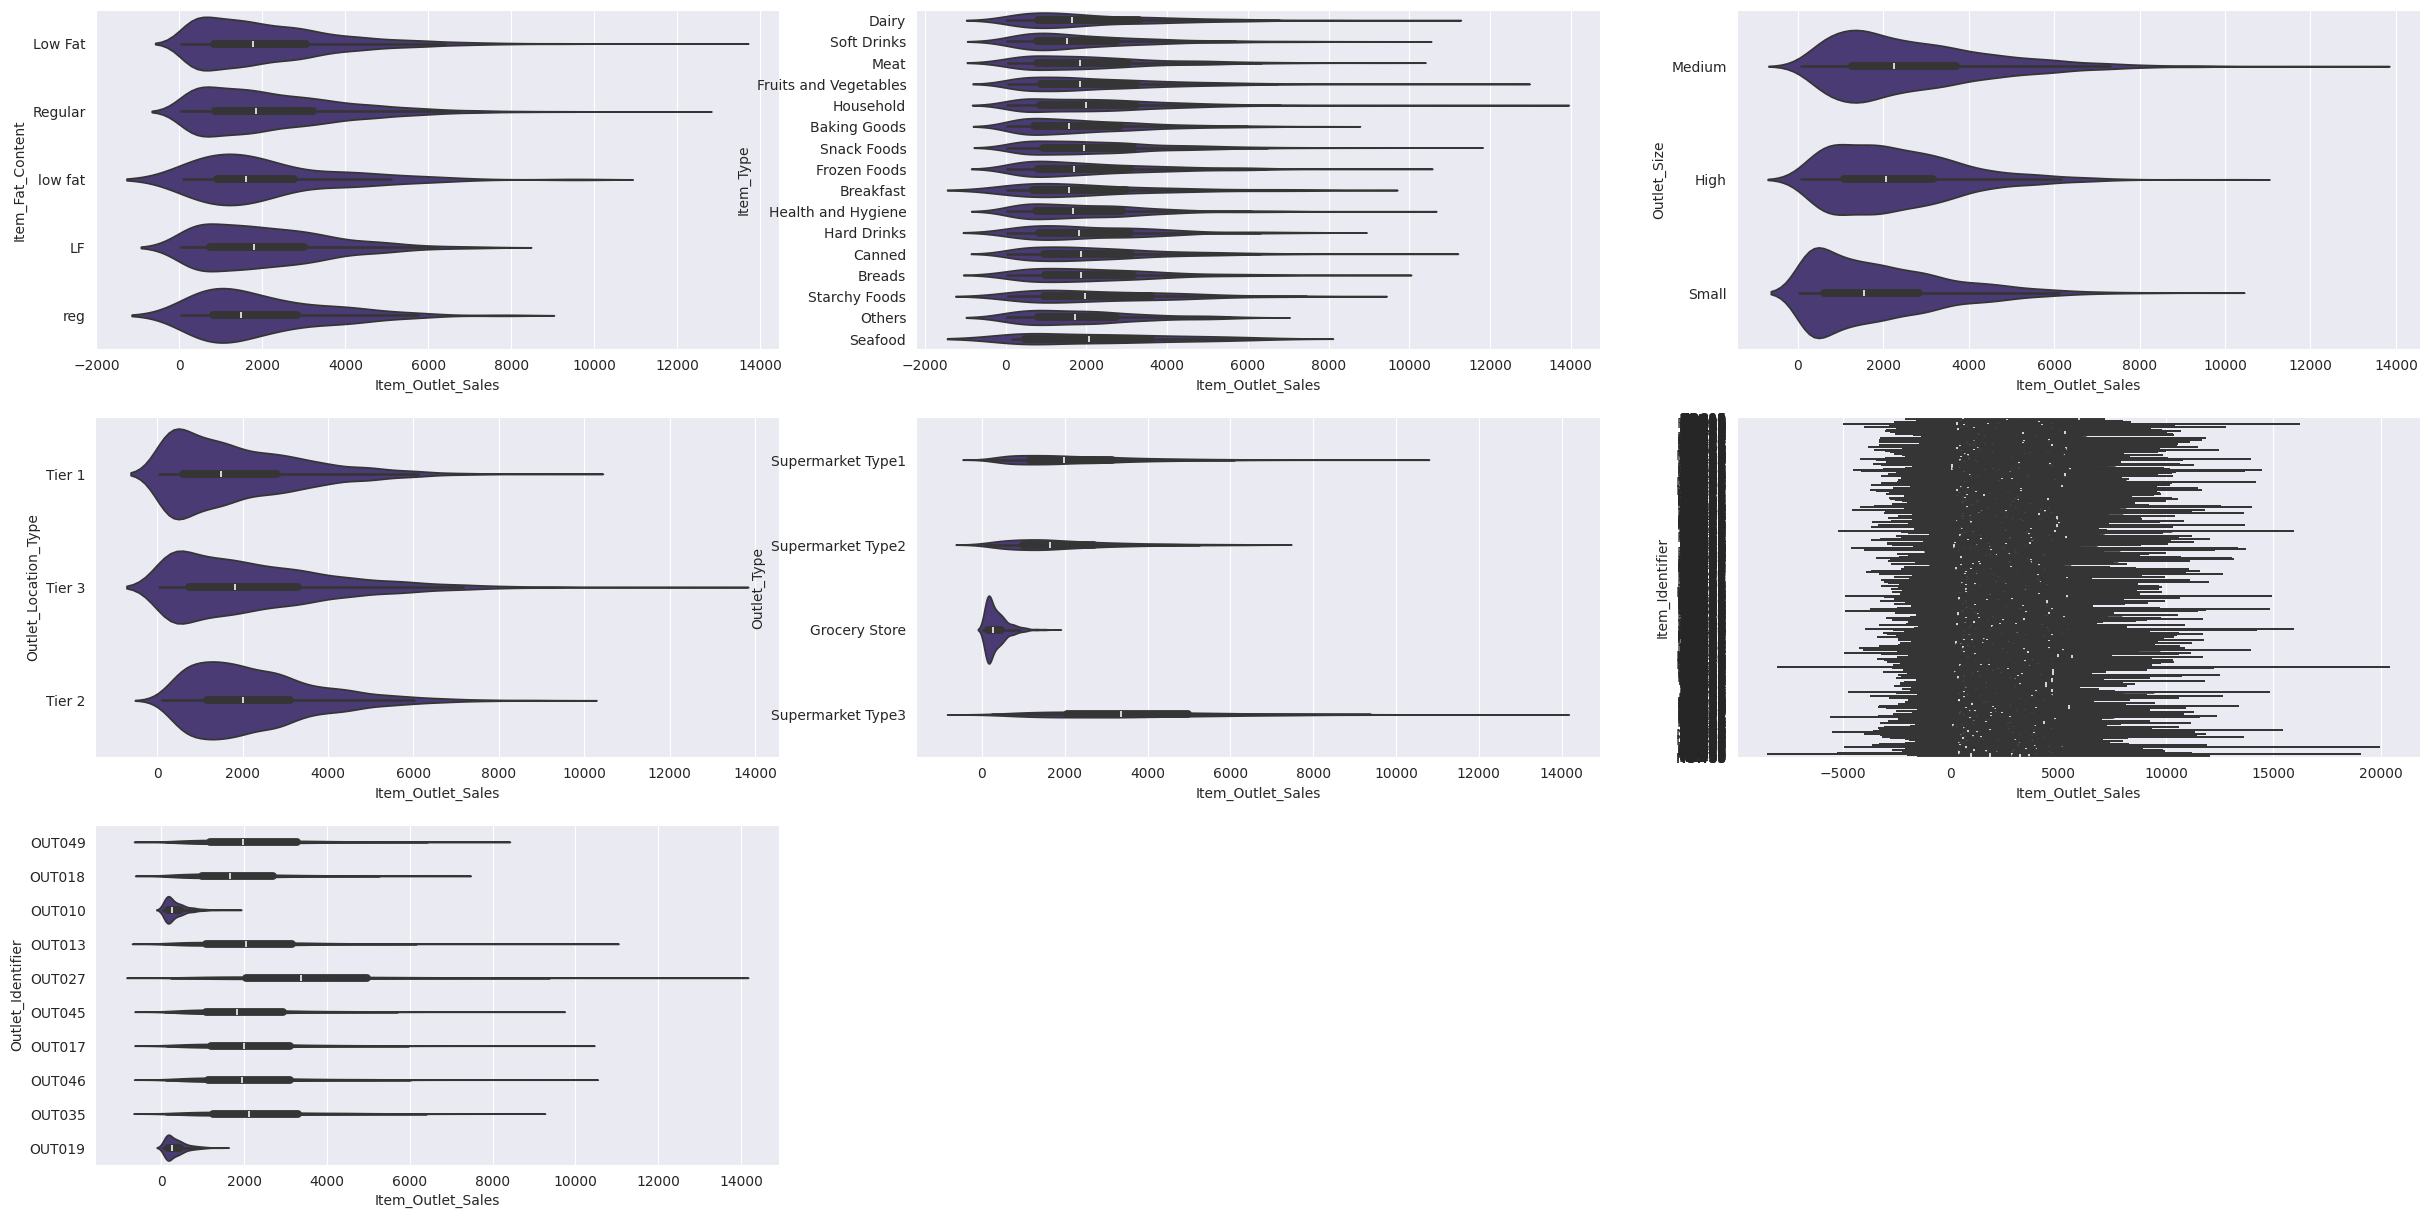

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.violinplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Item_Fat_Content'])

plt.subplot(3,3,2)
sns.violinplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Item_Type'])

plt.subplot(3,3,3)
sns.violinplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Size'])

plt.subplot(3,3,4)
sns.violinplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Location_Type'])

plt.subplot(3,3,5)
sns.violinplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Type'])

plt.subplot(3,3,6)
sns.violinplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Item_Identifier'])

plt.subplot(3,3,7)
sns.violinplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Identifier'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

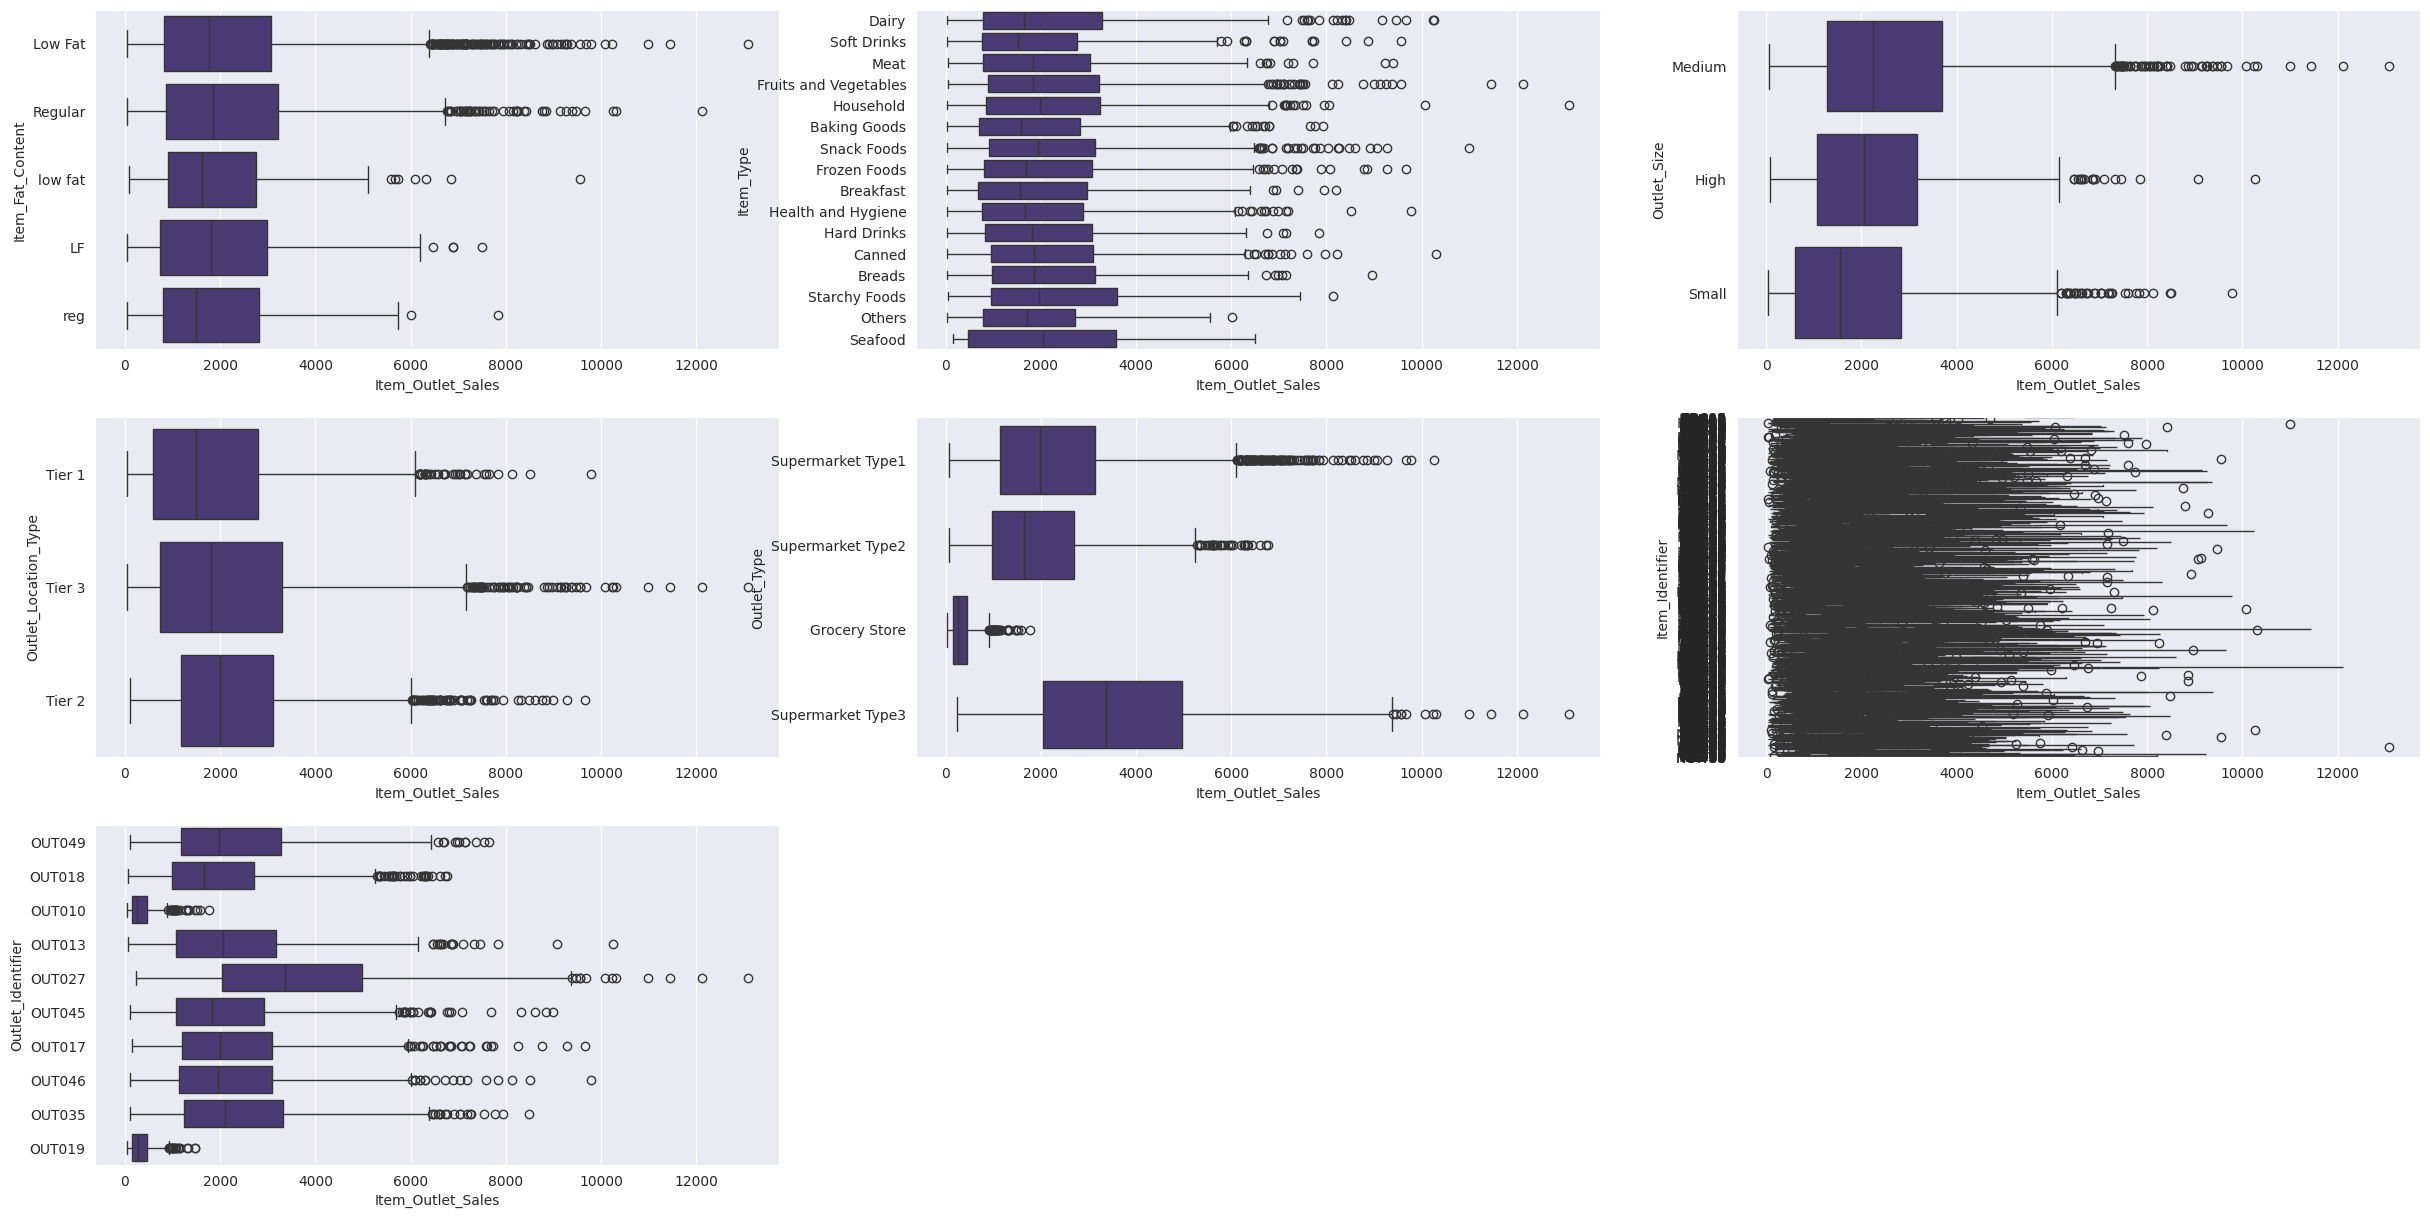

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.boxplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Item_Fat_Content'])

plt.subplot(3,3,2)
sns.boxplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Item_Type'])

plt.subplot(3,3,3)
sns.boxplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Size'])

plt.subplot(3,3,4)
sns.boxplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Location_Type'])

plt.subplot(3,3,5)
sns.boxplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Type'])

plt.subplot(3,3,6)
sns.boxplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Item_Identifier'])

plt.subplot(3,3,7)
sns.boxplot(x = df_num['Item_Outlet_Sales'], y=df_cat['Outlet_Identifier'])

In [ ]:
df_cat['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

#### ✨Findings:
New Item Type can be created --> parishable: 'Dairy','Meat','Fruits and Vegetables','Breads','Seafood'
non-parishable:

#  Step-2: Data Preprocessing 🧹
- imputation(Handle missing values),Remove duplicates and outliers
- Data Transformation- encoding(Cat-->Num),  Standardization or normalization
- Data Splitting

## Missing Value Treatment

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

In [ ]:
weight_median = imputer_median.fit_transform(df[['Item_Weight']])
Outlet_Size_mode = imputer_mode.fit_transform(df[['Outlet_Size']])

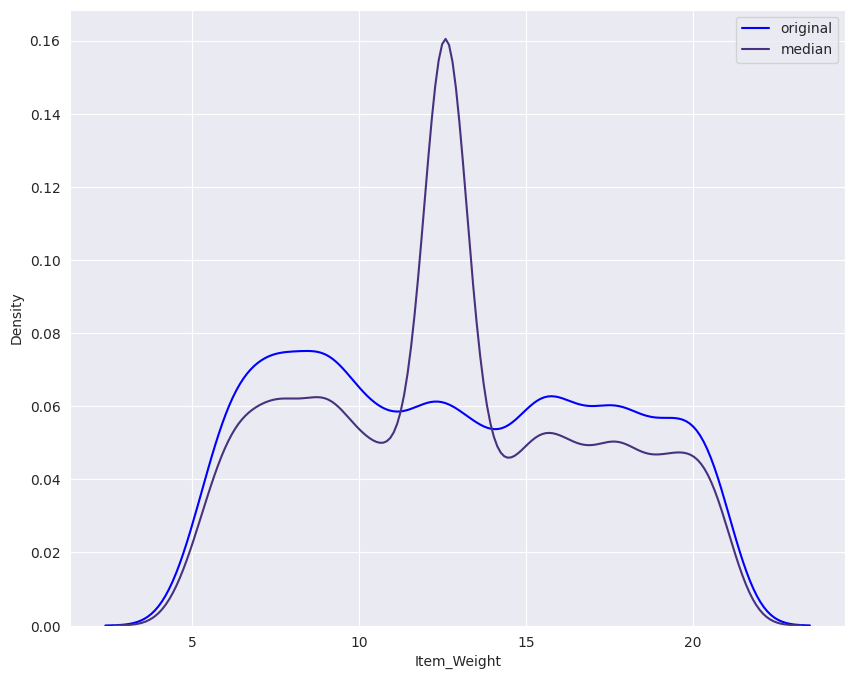

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['Item_Weight'], label='original', color='blue')
sns.kdeplot(weight_median, label='median', color='red')
plt.legend()

In [ ]:
df['Item_Weight'] = weight_median
df['Outlet_Size'] = Outlet_Size_mode.ravel()

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Replacing zero visibility data with mean value

In [ ]:
visibility_mean = df['Item_Visibility'].mean()
visibility_mean

0.06595278007399324

In [ ]:
for i in df['Item_Visibility']:
  if i == 0:
    df['Item_Visibility'] = df['Item_Visibility'].replace(0, visibility_mean)

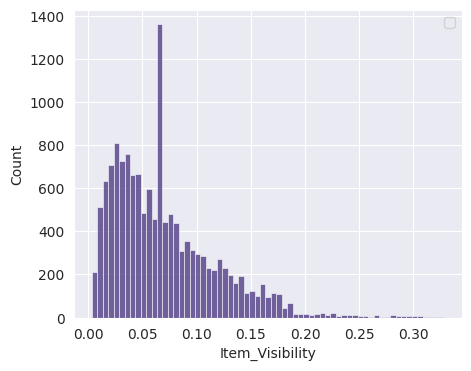

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['Item_Visibility'])
plt.legend()

## Outliers Treatment

## Removing Duplicates

In [ ]:
df.duplicated().sum()

0

## Removing Skewness

<Axes: xlabel='Item_Visibility', ylabel='Density'>

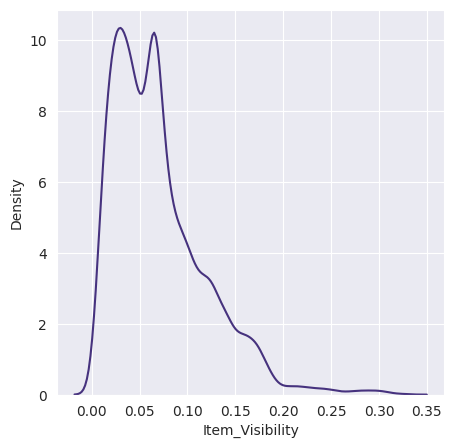

In [ ]:
#Before transformation
plt.figure(figsize=(5,5))
sns.kdeplot(df['Item_Visibility'])

In [ ]:
# Item_visibility
df['Item_Visibility'] = np.log1p(df['Item_Visibility'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

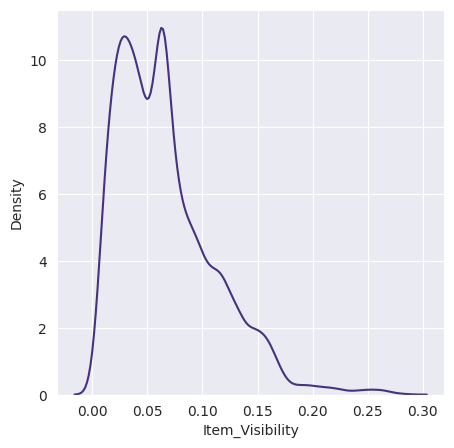

In [ ]:
plt.figure(figsize=(5,5))
sns.kdeplot(df['Item_Visibility'])

In [ ]:
df['Item_Visibility'].head()

,Item_Visibility
0,0.015920
1,0.019095
2,0.016621
3,0.063869
4,0.063869


## Scaling Numeric Features

## Correlated Variables

# Step-3: Feature Engineering 👨‍🔧

## New Features

**Item_Price_Cluster**

In [ ]:
def assign_cluster(mrp):
  if mrp < 71:
    return 'Low-Price'
  elif mrp>=71 and mrp <= 135:
    return 'Medium-Price'
  elif mrp>=136 and mrp<=205:
    return 'High-Price'
  else: return 'Very-High-Price'

df['Item_Price_Cluster'] = df['Item_MRP'].apply(assign_cluster)

**Outlet Type**

In [ ]:
def outlet_cluster(outlet_year):
  if outlet_year < 2000:
    return 'Old'
  elif outlet_year >= 2000 and outlet_year <2005:
    return 'Middle_Age'
  else:
    return 'New'

df['Outlet_Type_Cluster'] = df['Outlet_Establishment_Year'].apply(outlet_cluster)

In [ ]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Price_Cluster,Outlet_Type_Cluster
7378,FDJ26,15.300,Regular,0.081682,Canned,215.7218,OUT018,2009,Medium,Tier 3,Supermarket Type2,1923.4962,Very-High-Price,New
13905,FDY02,8.945,Regular,0.084016,Dairy,261.7910,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Very-High-Price,Old
12137,FDF58,13.300,Low Fat,0.009550,Snack Foods,62.4510,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,Low-Price,Old
577,DRE25,15.350,Low Fat,0.070709,Soft Drinks,92.1120,OUT035,2004,Small,Tier 2,Supermarket Type1,1118.5440,Medium-Price,Middle_Age
12611,FDS23,12.600,Low Fat,0.131210,Breads,128.1994,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Medium-Price,Old


## Encoding

### Label Encoding

### One Hot Encoding

# Step-4: Model Building 🤖

## Models

## Evaluation Metrics

## Variable Importance

#Step-4: Export the tested model to a pickle file 💾

## Export location and column information to a file that will be useful later on in our prediction application